# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
downloaded = drive.CreateFile({'id':"1zvbWRRSOb4KdqLwA2LRRb6y9cURHnlot"})   # replace the id with id of file you want to access
downloaded.GetContentFile('users.xlsx')

downloaded = drive.CreateFile({'id':"1Zvf1ehG0eUUcTBfi2YoWxwanJEt2-dmf"})   # replace the id with id of file you want to access
downloaded.GetContentFile('workouts.csv')

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [9]:
# напиши здесь код
workouts.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530


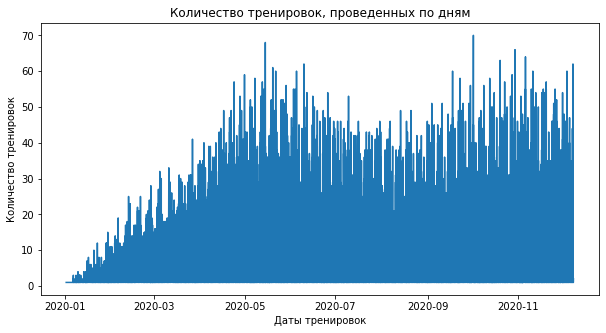

In [34]:
import datetime as dt 
workouts.dropna() #delete data with nan
workouts['date'] = workouts['start_at'].dt.date #delete info about time from "start_at" column
trainings_by_day = workouts[['start_at', 'workout_id']].groupby('start_at').count() #create new dataframe with index as date, column as quantity of trainings
plt.figure(figsize=(10,5)) #change plot size
plt.plot(trainings_by_day['workout_id']) #insert data in plot
plt.title('Количество тренировок, проведенных по дням')
plt.xlabel('Даты тренировок')
plt.ylabel('Количество тренировок')
plt.show()

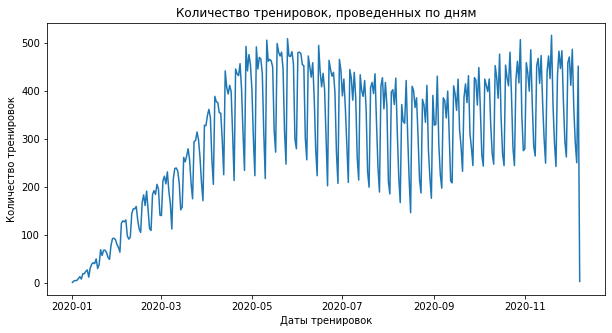

In [37]:
#Честно говоря, оставлять дату с указанием времени для графика не очень удобно, на мой взгляд лучше так:
workouts['date'] = workouts['start_at'].dt.date #delete info about time from "start_at" column
trainings_by_day1 = workouts[['date', 'workout_id']].groupby('date').count() #create new dataframe with index as date, column as quantity of trainings
plt.figure(figsize=(10,5)) #change plot size
plt.plot(trainings_by_day1['workout_id']) #insert data in plot
plt.title('Количество тренировок, проведенных по дням')
plt.xlabel('Даты тренировок')
plt.ylabel('Количество тренировок')
plt.show()

Судя по графикам, первая половина 2020 года выдалась сложной (можно предположить, что из-за ковида и ограничений). Тем не менее, к лету количество тренировок значительно увеличилось (сложно сделать выводы, достигло ли оно прежних значений, так как нет данных за предыдущие периоды). Судя по колебаниям, можно предположить, что есть определенные закономерности посещения по дням недели.

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [11]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [12]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [13]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [14]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

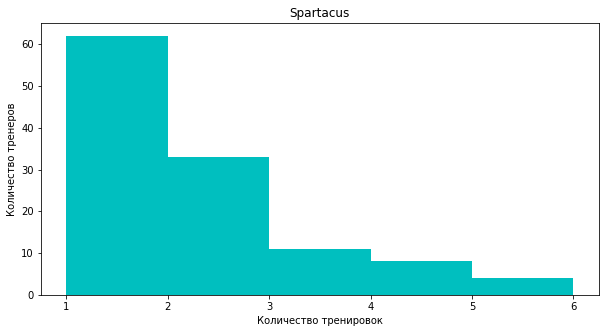

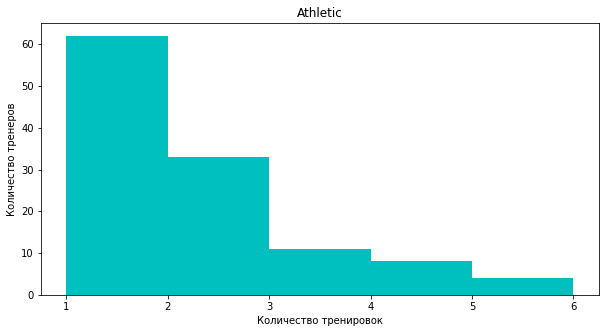

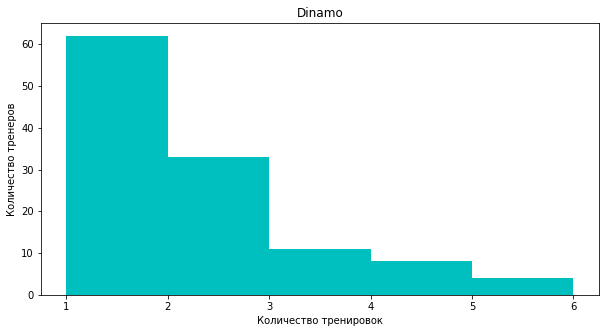

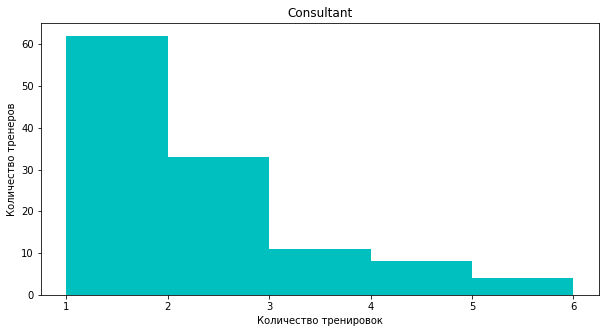

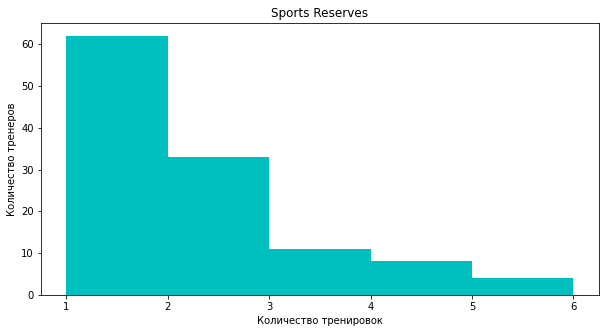

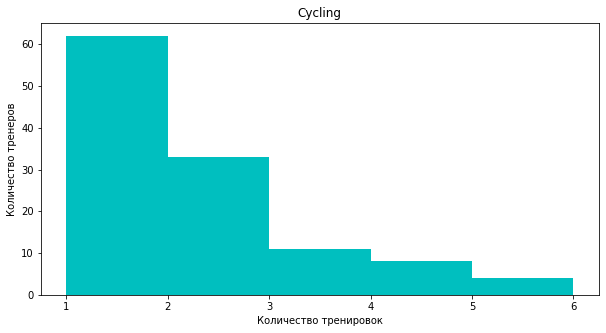

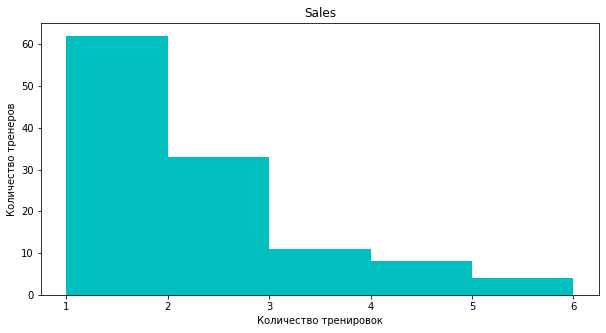

In [20]:
# напиши здесь код
for department in departments:
  department_workouts = workouts_by_trainer.query(f'trainer_department == "{element}"') #filter by department
  plt.figure(figsize=(10,5)) #set grafic size
  plt.title(department)
  plt.hist(department_workouts['workouts'], bins = 5, color='c')
  plt.xlabel("Количество тренировок")
  plt.ylabel("Количество тренеров")
  plt.show()

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

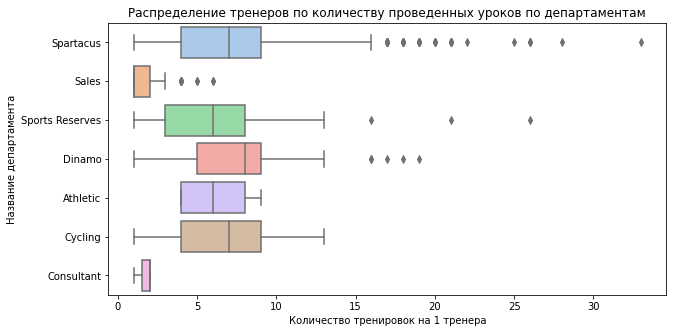

In [93]:
# напиши здесь код
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5)) #set figure size
plt.title('Распределение тренеров по количеству проведенных уроков по департаментам')
ax = sns.boxplot(x=workouts_by_trainer['workouts'], #total workouts
                 y=workouts_by_trainer['trainer_department'], #departments
                 data=workouts_by_trainer, #workouts by trainer
                 palette='pastel') #set color schema
ax.set(xlabel='Количество тренировок на 1 тренера', ylabel='Название департамента')
plt.show()

Исходя из «ящика с усами», можно сделать вывод, что в департаментах Sales и Consultant минимальная нагрузка на тренеров в департаментах Consultant и Sales. 
Самая большая нагрузка — в отделах Spartacus и Dinamo. Здесь высокая медиана и большое количество выбросов, что указывает на то, что отдельные тренеры перерабатывают. Можно порекомендовать проанализировать работу этих двух отделов и перераспределить часть тренировок на работников отделов Consultant и Sales.

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [99]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg.head()

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294


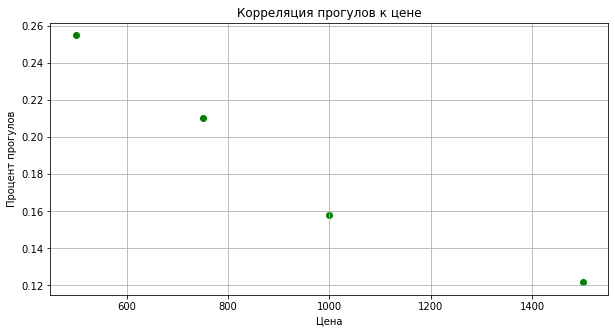

In [100]:
# напиши здесь код
cost_data_agg = cost_age_data.groupby(['cost'])['status'].mean().reset_index() #aggregate data per price
plt.figure(figsize=(10,5)) #set figure size
plt.title('Корреляция прогулов к цене')
plt.scatter(cost_data_agg['cost'], 
						cost_data_agg['status'], 
            color='g')
plt.ylabel("Процент прогулов")
plt.xlabel("Цена")
plt.grid() #add grid for better visualisation
plt.show()

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

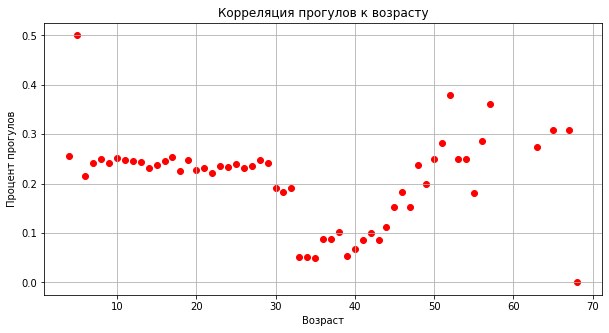

In [101]:
# напиши здесь код
age_data_agg = cost_age_data.groupby(['age'])['status'].mean().reset_index() #aggregate date per age
plt.figure(figsize=(10,5)) #set figure size
plt.title('Корреляция прогулов к возрасту')
plt.scatter(age_data_agg['age'], 
						age_data_agg['status'], 
            color='r')
plt.ylabel("Процент прогулов")
plt.xlabel("Возраст")
plt.grid() #add grid for better visualisation
plt.show()

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

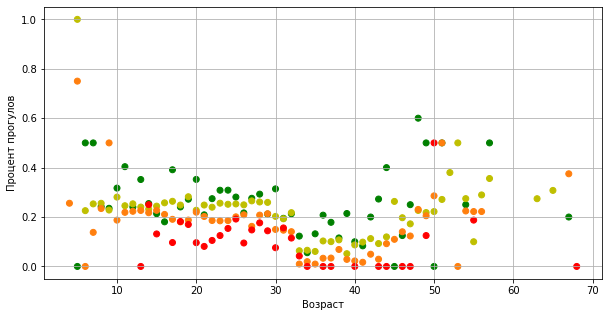

In [111]:
# напиши здесь код
price_color = set(cost_age_data_agg['cost'])
price_color = {500:'g', 750: 'y', 1000: 'tab:orange', 1500: 'r'} #dict with colors
c = cost_age_data_agg['cost'].map(price_color)
plt.figure(figsize=(10,5)) #set figure size
plt.scatter(cost_age_data_agg['age'], 
						cost_age_data_agg['status'], 
            c=c)
plt.ylabel("Процент прогулов")
plt.xlabel("Возраст")
plt.grid() #add grid for better visualisation
plt.show()

## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [27]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [80]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg.head()

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573


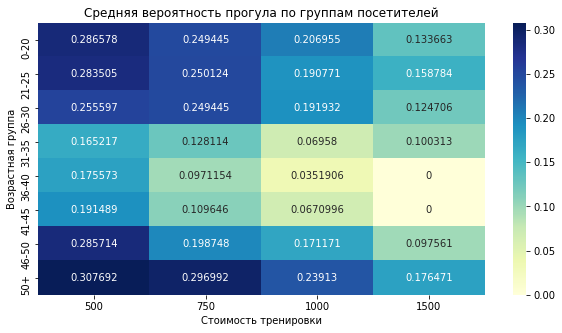

In [92]:
# напиши здесь код
pivot_table = cost_age_data_agg.pivot(index='age_bin', columns='cost',values='status')
plt.figure(figsize=(10,5)) #set figure size
plt.title('Средняя вероятность прогула по группам посетителей')
plt.xlabel('1')
ax = sns.heatmap(pivot_table, 
            annot=True, # выведем значения в ячейках
            cmap="YlGnBu", # желто-зелено-синяя палитра
            fmt='g') # числа без дробной части
ax.set(xlabel='Стоимость тренировки', ylabel='Возрастная группа')
plt.show()

Во-первых, можно сделать общий вывод, что посетители в возрасте от 31 до 45 пропускают занятия меньше всего. Также прослеживается закономерность, по которой видно, что, чем больше посетитель платит за тренировку, тем меньше он их пропускает. Самые "беспроблемные" — посетители в возрасте от 36 до 45, которые платят 1500 за одну тренировку.

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [48]:
trainings_by_day.head() # посмотрим, в каком формате лежат нужные данные

,workout_id
start_at,
2020-01-01 19:40:00,1
2020-01-02 09:00:00,1
2020-01-02 09:40:00,1
2020-01-02 18:20:00,1
2020-01-02 19:00:00,1


In [46]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame.head()

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01 19:40:00,1,2,Wednesday
1,2020-01-02 09:00:00,1,3,Thursday
2,2020-01-02 09:40:00,1,3,Thursday
3,2020-01-02 18:20:00,1,3,Thursday
4,2020-01-02 19:00:00,1,3,Thursday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [47]:
trainings_by_day_frame['week_day_num'] += 1

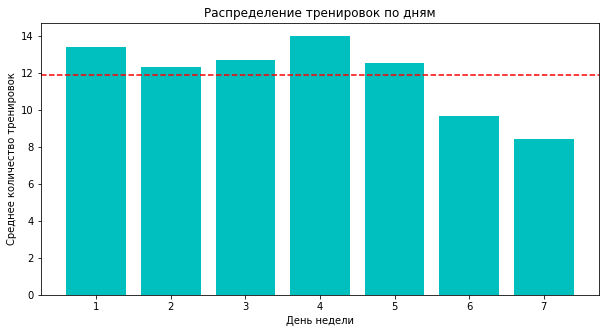

In [79]:
trainings_per_day = trainings_by_day_frame[['workouts', 'week_day_num']].groupby('week_day_num').mean()
mean_trainings = trainings_per_day['workouts'].mean() #define mean amount of trainings per day
plt.figure(figsize=(10,5))
plt.title('Распределение тренировок по дням')
plt.xlabel("День недели")
plt.ylabel("Среднее количество тренировок")
plt.bar(trainings_per_day.index, trainings_per_day['workouts'], color='c')
plt.axhline(mean_trainings, color='r', linestyle='--') #show mean amount of trainings per day
plt.show()

Как и предполагалось еще в задании 1, подобные перепады на графике объясняются просто — спортзал по выходным дням посещают примерно в 1,5 раза меньше, чем по будням. 

# 🎉🎉🎉 Поздравляем, ты великолепен! 